In [1]:
import pandas as pd
from pathlib import Path
# import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
# !yes | pip install yfinance
# import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import requests
import base64
from ezekial import yahooprophet as yfp

# %matplotlib inline

In [2]:
def load_tickers(ticker_path):
    """
    Takes five hundred tickers, which is max calls of yfinance for public ip
    """
    ticker_file_path = Path(ticker_path)
    ticker_df = pd.read_csv(ticker_file_path)
    prophet_ticker_list = ticker_df['Symbol'].head(500).to_list()

    print("First ticker in list: " + prophet_ticker_list[0])
    return prophet_ticker_list

In [3]:
prophet_ticker_list = load_tickers('data/S&P500 tickers.csv')

First ticker in list: AAPL


In [25]:
# for ticker in prophet_ticker_list:
#     print(ticker)

In [29]:
#CREATES A DATAFRAME OF THE CLOSE PRICE OF THE ticker_list STARTING FROM 2018
# for x in range(len(prophet_ticker_list)):
#     print(x)
    # try:
    #     if x == 0:
    #         df = yf.Ticker(prophet_ticker_list[x]).history(start='2018-01-01')['Close'].rename(ticker_list[x])    
    #     else:
    #         df1 = yf.Ticker(ticker_list[x]).history(start='2018-01-01')['Close'].rename(ticker_list[x])
    #         df = pd.concat([df, df1], axis=1)
    # except: print("yfinance api public ip calls reached daily limit.\nConsider using torify command &/or Alpha Vantage API")

In [48]:
yfp_obj = yfp.YahooProphet()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -17.48
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2213.85     0.0298273       237.658           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2281.22      0.228641       476.601           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       2282.42    0.00129215        407.55    2.71e-06       0.001      290  LS failed, Hessian reset 
     299       2307.23     0.0068996        227.24           1           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       2311.81   0.000997407       236.361   6.216e-06       0.001      498  LS failed, Hessian reset 
     381       2316.74    0.00454578       306.575   5.238e-05       0.001      604  LS failed, Hessian reset 

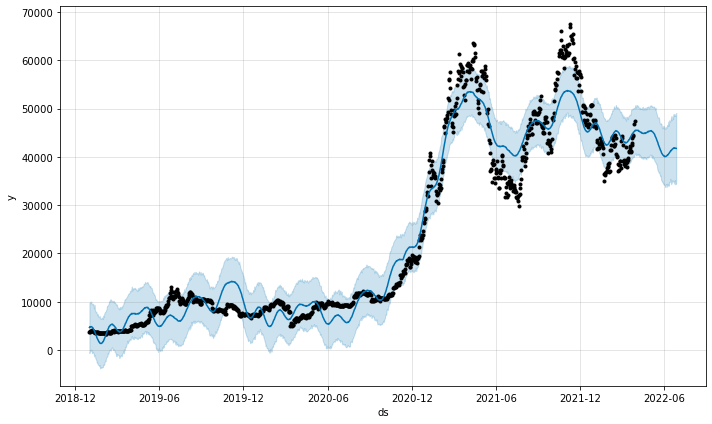

In [49]:
prophet_plot = yfp_obj.plot()

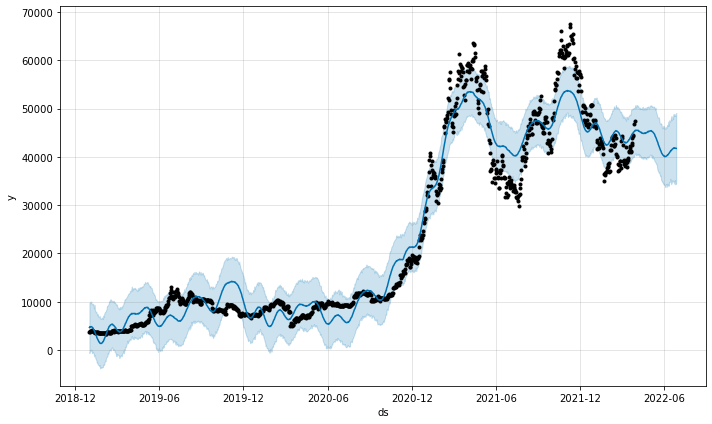

In [50]:
prophet_plot

# Byte Encoding Matplotlib Figure to byte string and decoding it

## Server Side (Put in Function in Ezekial Itself):
Look for more effecient method to rather than saving prior to converting to byte string.

In [51]:
# Have to convert from matplotlib figure to .png
forecast_img_path = Path('images/forecast_temp/forecast.png')
prophet_plot.savefig(forecast_img_path)

In [52]:
# Create the converted image to string
import base64

with open(forecast_img_path, "rb") as image2string:
    converted_string = base64.b64encode(image2string.read())
print(len(converted_string))
# print(converted_string.decode('utf-8'))

# Save converted string to .bin file
# USE POST METHOD ON THE API INSTEAD
forecast_img_path = Path('images/forecast_temp/encoded.bin')
with open(forecast_img_path, "wb") as file:
    file.write(converted_string)

In [54]:
# converted_string

bytes

## Client Side (app side)

In [86]:
import base64
# USE API CALL HERE FIRST 
# MAY NEED TO SAVE FIRST FOR READING IN BINARY MODE & SETTING AS A VAR
forecast_img_path = Path('images/forecast_temp/encoded.bin')
file = open(forecast_img_path, 'rb')
byte = file.read()
file.close()
# Decode string and save as a .png
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')
decodeit = open(forecast_decoded_img_path, 'wb')
decodeit.write(base64.b64decode((byte)))
decodeit.close()

In [ ]:
#load decoded image into Kivy

## Checking Ezekial Method

In [3]:
yfp_obj = yfp.YahooProphet(prophet_ticker_list[0], '2019-1-1', 90)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.50591
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2521.31       0.14254       2276.35           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2572.3     0.0120803        256.26       0.678           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2588.9    0.00140161       536.075           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     366       2593.63   0.000110521        159.26   1.758e-07       0.001      472  LS failed, Hessian reset 
     399       2595.56    0.00066646       206.927      0.5699      0.5699      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     471       2600.54   0.000281555    

Successfully saved AAPL image.


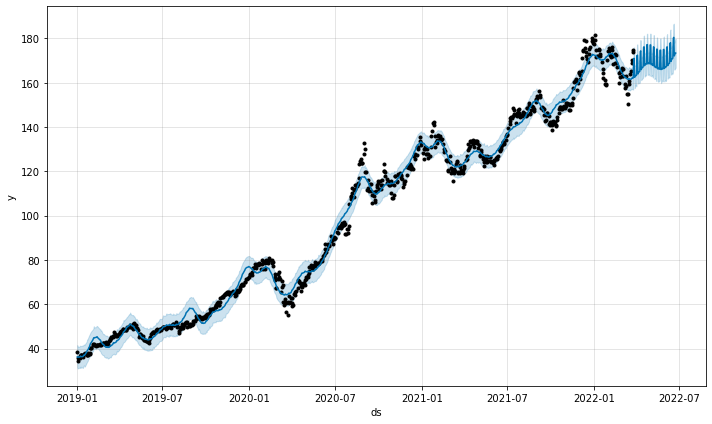

In [4]:
yfp_obj.encode_plot()

In [7]:
yfp_obj.decode_plot()
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')

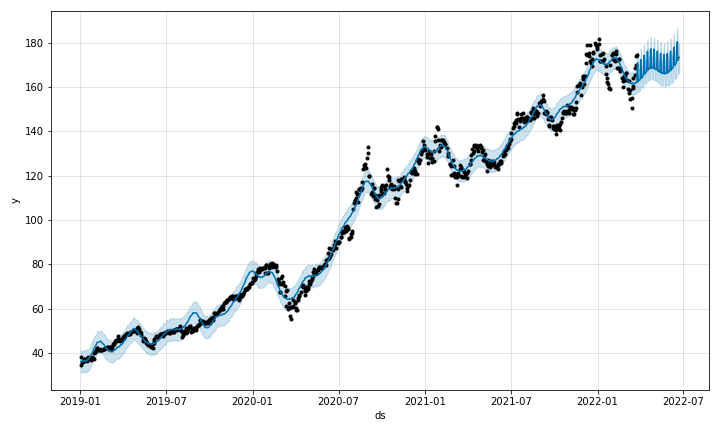

In [8]:
from PIL import Image                                                                                
img = Image.open(forecast_decoded_img_path)
img.show() 

# Make Function to Use Ezekial for the Entire Ticker List and Upload Images with POST to Django Server

```
conda activate forecastappenv
python ~/python_proj/Fintech-Forecast-App/mysite1anage.py runseserver 0.0.0.0:3555
```

### Checking Djanjo Requests

In [1]:
# import requests

In [40]:
# url = 'http://YOUR_IP/ds/'

In [41]:
# response = requests.get(url)
# response_json = response.json()
# response_json

[{'id': 1, 'ticker': '5', 'encoded_string': '1'},
 {'id': 2, 'ticker': 'appl', 'encoded_string': 'asdfasdfasdf'}]

In [24]:
# convert to dictionary
# response_json

[{'id': 1, 'ticker': '5', 'encoded_string': '1'}]

### Checking Django POST

In [12]:
# import requests

# # Have to convert from matplotlib figure to .png
# def make_and_save_first_ticker_plot():
#     prophet_ticker_list = load_tickers('data/S&P500 tickers.csv')
#     yfp_obj = yfp.YahooProphet(prophet_ticker_list[0], '2019-1-1', 90)
#     # forecast_img_path = Path('images/forecast_temp/forecast.png')
#     return yfp_obj.encode_plot()
    
#     # forecast_img_path = Path('images/forecast_temp/encoded.bin')
#     # with open(forecast_img_path, "r") as file:
#     #     encoded_image = str(file.readlines()).replace('[','').replace(']','')

In [124]:
# encoded_image = make_and_save_first_ticker_plot()

In [125]:
# encoded_image[:15]

In [126]:
# len(encoded_image[:15])

In [128]:
# prophet_t_list = load_tickers('data/S&P500 tickers.csv')

# json_post = {
#     "ticker": f"{prophet_t_list[5]}",
#     "encoded_string": f"{encoded_image[:15]}"
# }

# # json_post

In [127]:
# from dotenv import load_dotenv
# import os

# # https://anaconda.org/conda-forge/python-dotenv
# # conda install -c conda-forge python-dotenv -y
# load_dotenv()
# url = os.getenv("DJANGO_SERVER_URL")
# url

In [129]:
# requests.post(url,json_post)

In [130]:
# url += ''
# url

In [131]:
# url[:-1]

In [132]:
# requests.delete(url)

In [133]:
# len(django_get())

# Django SQL DB Methods

```
conda activate forecastappenv
python ~/python_proj/Fintech-Forecast-App/mysite1/manage.py runseserver 0.0.0.0:3555
```

In [1]:
import requests
from dotenv import load_dotenv
import os

def django_get(url):
    response = requests.get(url)
    response_json = response.json()
    return response_json

load_dotenv()
url = os.getenv("DJANGO_SERVER_URL")
django_api_dict = django_get(url)
django_api_dict

[]

In [2]:
import requests
from dotenv import load_dotenv
import os

def clear_django_sql_db():
    """
    Clears the sql db in the django api.
    "DJANGO_SERVER_URL" is provided in .env file.
    """
    
    try:
        load_dotenv()
        url = os.getenv("DJANGO_SERVER_URL")
        
        django_api_items = django_get(url)
        
        if len(django_api_items) != 0:
            for x, index_id in enumerate(django_api_items):
                x += 1
                str_indx = str(index_id['id'])
                
                if x == 1:
                    url += str(str_indx)
                    requests.delete(url)
                    # print(f'entered if block\t{url}')
                else:
                    try:
                        url = url[:-len(str_indx)] + str_indx
                        requests.delete(url)
                        # print(f'entered else block\t{url}')
                    # For when the number of digits change
                    except:
                        url = url[:-len(str_indx)] + str_indx + 1
                        requests.delete(url)                    
                        # print(f'entered else block\t{url}')
            print(f"Django SQL DB cleared:\n\n{django_get()}")
        else:
            print("Django SQL DB Already empty:\n\n{django_get()}")
    except:
        print(f"Django server did not clear:\n\n{django_get()}")

# clear_django_sql_db()

In [14]:
import pandas as pd
from pathlib import Path
# https://anaconda.org/conda-forge/python-dotenv
# conda install -c conda-forge python-dotenv -y
from dotenv import load_dotenv
import os
# import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
# !yes | pip install yfinance
# import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import requests
from ezekial import yahooprophet as yfp


# Have to convert from matplotlib figure to .png
def make_and_save_ticker_plot(ticker_path='data/S&P500 tickers.csv', start_date='2019-1-1', forecast_ahead=90, url="http://127.0.0.1:8000/ds"):
    """
    Scrapes yfinance from tickers provided in 'data/S&P500 tickers.csv',
    then uses Ezekial package to generate forecast plots.
    Plots are then encdoded and stored in the Djanog server API, using
    REQUESTS and a POST.
    
    Parameters
    ----------
    ticker_path : str
        Path from function to ticker data.
        Should be a .csv file with a header col named 'Symbol'.
        Selects top 500 tickers, due to yfinance public ip api limits.
        Defaults to data/S&P500 tickers.csv
        
    start_date : str
        YYYY-MM-DD format, this is the start date of the returned df.
        Defaults to 2019-1-1
        
    forecast_ahead : int
        Number of days for FB Prophet to forecast.
        Defaults to 90.
    
    url : str
        URL to send Django API POST's.
        Defaults to "http://127.0.0.1:8000/ds".
    
    See Also
    --------
    yfinance.Ticker() : https://pypi.org/project/yfinance/
    prophet.Prophet() : https://facebook.github.io/prophet/docs/quick_start.html#python-api

    Examples
    --------
    >>> make_and_save_ticker_plot()
    
    >>> 
    
    >>> 
    """
        
    def load_tickers(ticker_path):
        """
        Takes five hundred tickers, which is max calls of yfinance for public ip.
        """
        ticker_file_path = Path(ticker_path)
        ticker_df = pd.read_csv(ticker_file_path)
        prophet_ticker_list = ticker_df['Symbol'].head(500).to_list()
        return prophet_ticker_list

    # return load_tickers('data/S&P500 tickers.csv')
    
    def make_plots(url):
        """
        Makes and encodes the plots and POST's to Django API.
        """
        
        # REMOVE [:3] TO RUN FULL LIST 
        for tick in load_tickers(ticker_path)[:3]:
            try:
                yfp_obj = yfp.YahooProphet(tick, start_date, forecast_ahead)
                
                json_post = {
                    "ticker": f"{tick}",
                    "encoded_string": f"{yfp_obj.encode_plot()}"
                }
                
                print(f"+++ {tick} success!")
                requests.post(url,json_post)
                
            except:
                print(f"\t--- {tick} failed ---")
                print("\n\n\tyfinance API daily limit reached.")
            
    make_plots(url)
    
    # forecast_img_path = Path('images/forecast_temp/encoded.bin')
    # with open(forecast_img_path, "r") as file:
    #     encoded_image = str(file.readlines()).replace('[','').replace(']','')
    
    # encoded_image = make_and_save_ticker_plot()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.77059
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2520.33     0.0194851       306.527           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2567.26    0.00734431       182.437           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2584.49     0.0250116       219.142           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       2584.58   5.86485e-05       142.954   2.265e-07       0.001      392  LS failed, Hessian reset 
     399       2590.77    0.00206872       483.797           1           1      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2594.88    0.00665191    

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.8318
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2490.86    0.00797572       241.517           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2524.97      0.121818       1019.08           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       2528.14   7.05151e-05       173.653   3.484e-07       0.001      288  LS failed, Hessian reset 
     299       2541.77    0.00509787       427.613           1           1      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     385       2547.96   7.02446e-05       168.797   2.698e-07       0.001      544  LS failed, Hessian reset 
     399       2548.43   0.000300956       528.535      0.4615      0.4615      559   
    Iter      log prob

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.30698
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2418.16    0.00700512       596.698           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2443.47    0.00319224       214.549           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2452.72   0.000775187       211.017           1           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2456.11   0.000116956       141.887      0.1303      0.1303      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     485       2459.53   0.000305771       435.672   8.066e-07       0.001      653  LS failed, Hessian reset 
     499        2460.8     0.0103975    

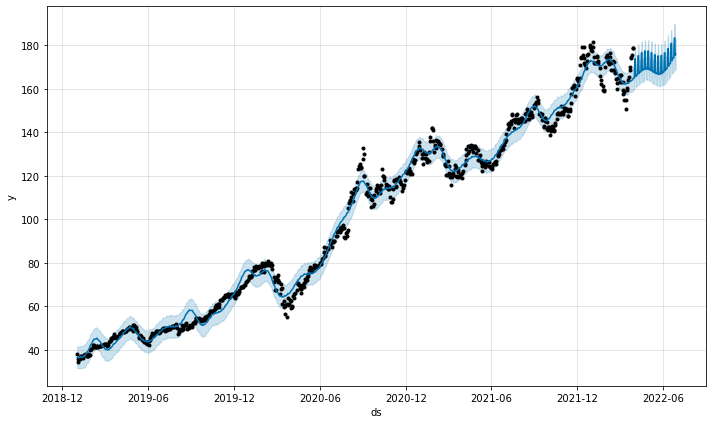

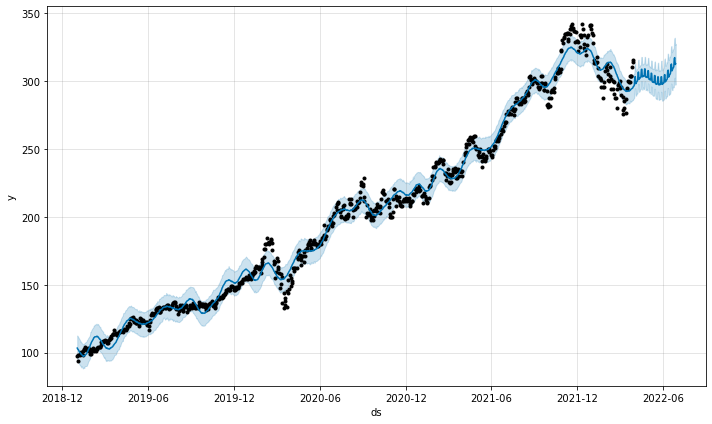

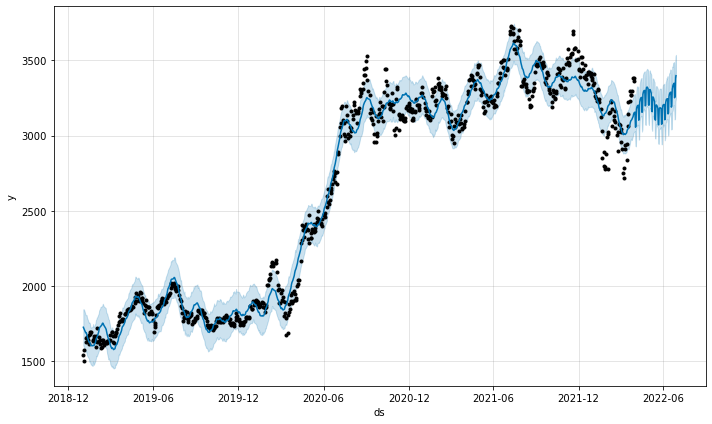

In [15]:
load_dotenv()
url = os.getenv("DJANGO_SERVER_URL")
url

make_and_save_ticker_plot(url=url)

In [15]:
load_dotenv()
url = os.getenv("DJANGO_SERVER_URL")
django_api_dict = django_get(url)
# django_api_dict

In [16]:
# clear_django_sql_db()

# load_dotenv()
# url = os.getenv("DJANGO_SERVER_URL")
# django_api_dict = django_get(url)
# django_api_dict

## Check App Side

In [126]:
import requests
from dotenv import load_dotenv
import os

def django_get(url):
    response = requests.get(url)
    response_json = response.json()
    return response_json

load_dotenv()
url = os.getenv("DJANGO_SERVER_URL")
django_api_dict = django_get(url)

django_api_dict[0].keys()
# django_api_dict

dict_keys(['id', 'ticker', 'encoded_string'])

In [141]:
import base64

def select_ticker(ticker):
    for dictionary in django_api_dict:    
        try:
            if dictionary['ticker'] == ticker:
                encoded_plot = dictionary['encoded_string']
        except: return print("Ticker Not Found in Forecast Database")
        
    # Decode string and save as a .png
    forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')
    decodeit = open(forecast_decoded_img_path, 'wb')
    decodeit.write(base64.b64decode(encoded_plot[2:].encode()))
    decodeit.close()

In [142]:
select_ticker('AAPL')

In [7]:
import requests
from dotenv import load_dotenv
import os
import base64
from pathlib import Path

class save_ticker_image:
    def __init__(self, url, img_path, ticker):
        self.url = url
        self.img_path = img_path
        self.ticker = ticker
    
    def django_get(self):
        response = requests.get(self.url)
        response_json = response.json()
        return response_json

    def select_ticker(self):
        django_api_dict = self.django_get()
        for dictionary in django_api_dict:   
            try:
                if dictionary['ticker'] == self.ticker:
                    encoded_plot = dictionary['encoded_string']
            except: return print("Ticker Not Found in Forecast Database")
        # Decode string and save as a .png
        try:
            decodeit = open(self.img_path, 'wb')
            decodeit.write(base64.b64decode(encoded_plot[2:].encode()))
            decodeit.close()
            print("Image Saved Successfully")
        except: return print("Could Not Save Plot Ticker Not Found")


In [6]:
load_dotenv()
url = os.getenv("DJANGO_SERVER_URL")
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')

save_ticker_image(url=url, img_path=forecast_decoded_img_path, ticker='MSFT').select_ticker()

Image Saved Successfully


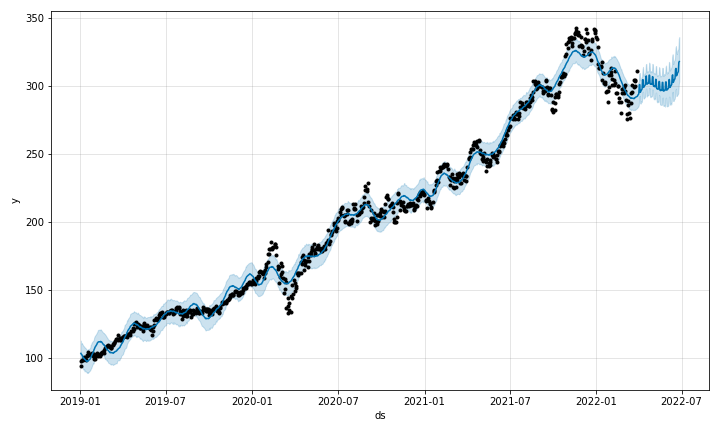

In [158]:
#Check Saved Image
from PIL import Image

forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')

img = Image.open(forecast_decoded_img_path)
img.show() 

In [128]:
for dictionary in django_api_dict:
    # print(dictionary['id'], dictionary['ticker'])
    
    if dictionary['ticker'] == 'AAPL':
        # print(dictionary['encoded_string'])
        encoded_plot = dictionary['encoded_string']

In [129]:
encoded_plot[:22]

"b'iVBORw0KGgoAAAANSUhE"

In [92]:
encoded_plot[2:22]

'iVBORw0KGgoAAAANSUhE'

In [93]:
# bytes(encoded_plot[2:], encoding='utf-8')

encoded_plot1 = encoded_plot[2:].encode()
encoded_plot1[:20]

b'iVBORw0KGgoAAAANSUhE'

In [95]:
# # Save converted string to .bin file
# # USE POST METHOD ON THE API INSTEAD
# forecast_img_path = Path('images/forecast_temp/encoded.bin')
# with open(forecast_img_path, "wb") as file:
#     file.write(encoded_plot1)
#     file.close()

In [96]:
# forecast_img_path = Path('images/forecast_temp/encoded.bin')
# file = open(forecast_img_path, 'rb')
# byte = file.read()
# file.close()

In [98]:
# byte

In [100]:
# encoded_plot1

In [106]:
import base64

# Decode string and save as a .png
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')
decodeit = open(forecast_decoded_img_path, 'wb')
decodeit.write(base64.b64decode(encoded_plot[2:].encode()))
decodeit.close()


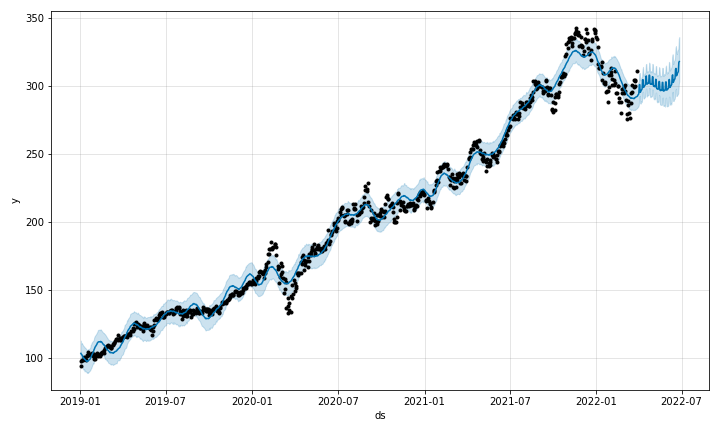

In [108]:
from PIL import Image                                                                                
img = Image.open(forecast_decoded_img_path)
img.show() 

# Alpha Vantage
https://www.alphavantage.co/

In [76]:
import requests
from dotenv import load_dotenv
import os
import pandas as pd
from prophet import Prophet
import base64
from pathlib import Path

load_dotenv()
AV_KEY = os.getenv("APLHA_VANTAGE_KEY")
# AV_KEY

In [96]:
symbol = 'IWL'

# Time interval between two consecutive data points in the time series. The following values are supported: 1min, 5min, 15min, 30min, 60min
time_interval = '60min'

In [97]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={time_interval}&apikey={AV_KEY}'
r = requests.get(url)
data = r.json()

In [98]:
type(data)

dict

In [99]:
for i, j in enumerate(data):
    print(i, j)

0 Meta Data
1 Time Series (60min)


In [81]:
data['Meta Data']

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2022-03-28 20:00:00',
 '4. Interval': '60min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [82]:
# data

In [83]:
df = pd.DataFrame(data['Time Series (60min)']).T
df

,1. open,2. high,3. low,4. close,5. volume
2022-03-28 20:00:00,310.4100,310.7500,310.2700,310.7000,19024
2022-03-28 19:00:00,310.7000,310.7000,310.3200,310.5000,13629
2022-03-28 18:00:00,310.6900,310.8000,310.6500,310.7300,10518
2022-03-28 17:00:00,310.7000,310.8800,310.5000,310.7399,2195880
2022-03-28 16:00:00,309.6500,310.8000,309.0200,310.7600,5432587
...,...,...,...,...,...
2022-03-21 05:00:00,299.7500,299.7500,298.8500,299.4000,11913
2022-03-18 20:00:00,300.3500,300.8000,300.2500,300.7800,59779
2022-03-18 19:00:00,300.2500,300.5500,300.2500,300.2500,9691
2022-03-18 18:00:00,300.4600,300.4600,299.7200,300.2425,22042


In [69]:
# Facebook Prophet needs one column named 'ds' & 'y'
df_prophet = pd.DataFrame()
df_prophet['y'] = df['4. close']
df_prophet['ds'] = df_prophet.index
df_prophet['ds']
df_prophet = df_prophet[['ds','y']]
df_prophet.reset_index(drop=True, inplace=True)
df_prophet

,ds,y
0,2022-03-28 20:00:00,310.7000
1,2022-03-28 19:00:00,310.5000
2,2022-03-28 18:00:00,310.7300
3,2022-03-28 17:00:00,310.7399
4,2022-03-28 16:00:00,310.7600
...,...,...
95,2022-03-21 05:00:00,299.4000
96,2022-03-18 20:00:00,300.7800
97,2022-03-18 19:00:00,300.2500
98,2022-03-18 18:00:00,300.2425


In [71]:
m = Prophet()
m.fit(df_prophet)
future = m.make_future_dataframe(periods=12)
forecast = m.predict(future)
# self.forecast = forecast
# self.m = m
forecast

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/home/unknown/anaconda3/envs/forecastappenv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/unknown/anaconda3/envs/forecastappenv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/unknown/anaconda3/envs/forecastappenv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components =

Initial log joint probability = -2.02815
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       465.388    0.00039245        236.39           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       469.937    0.00041377       175.858      0.2214      0.9694      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       470.942   8.08428e-05       94.6549      0.6043      0.6043      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     387        471.13   3.87557e-05       167.263   2.761e-07       0.001      496  LS failed, Hessian reset 
     399       471.202   7.30951e-05       78.7763      0.8451      0.8451      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     456       471.324   3.76075e-05    

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-18 17:00:00,300.546151,298.812313,302.807210,300.546151,300.546151,0.235021,0.235021,0.235021,0.235021,0.235021,0.235021,0.0,0.0,0.0,300.781172
1,2022-03-18 18:00:00,300.527039,298.457942,302.535477,300.527039,300.527039,0.044275,0.044275,0.044275,0.044275,0.044275,0.044275,0.0,0.0,0.0,300.571315
2,2022-03-18 19:00:00,300.507928,298.169549,302.098585,300.507928,300.507928,-0.236615,-0.236615,-0.236615,-0.236615,-0.236615,-0.236615,0.0,0.0,0.0,300.271313
3,2022-03-18 20:00:00,300.488817,298.628890,302.676616,300.488817,300.488817,0.078306,0.078306,0.078306,0.078306,0.078306,0.078306,0.0,0.0,0.0,300.567123
4,2022-03-21 05:00:00,299.399469,296.604268,300.543030,299.399469,299.399469,-0.828585,-0.828585,-0.828585,-0.828585,-0.828585,-0.828585,0.0,0.0,0.0,298.570884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2022-04-05 20:00:00,320.393670,296.816474,341.481654,297.050033,341.535719,0.078306,0.078306,0.078306,0.078306,0.078306,0.078306,0.0,0.0,0.0,320.471976
108,2022-04-06 20:00:00,321.832096,294.428826,347.664663,294.111607,347.003404,0.078306,0.078306,0.078306,0.078306,0.078306,0.078306,0.0,0.0,0.0,321.910402
109,2022-04-07 20:00:00,323.270521,290.511145,353.133868,290.285268,352.968460,0.078306,0.078306,0.078306,0.078306,0.078306,0.078306,0.0,0.0,0.0,323.348828
110,2022-04-08 20:00:00,324.708947,286.481888,359.645881,286.164129,360.017345,0.078306,0.078306,0.078306,0.078306,0.078306,0.078306,0.0,0.0,0.0,324.787253


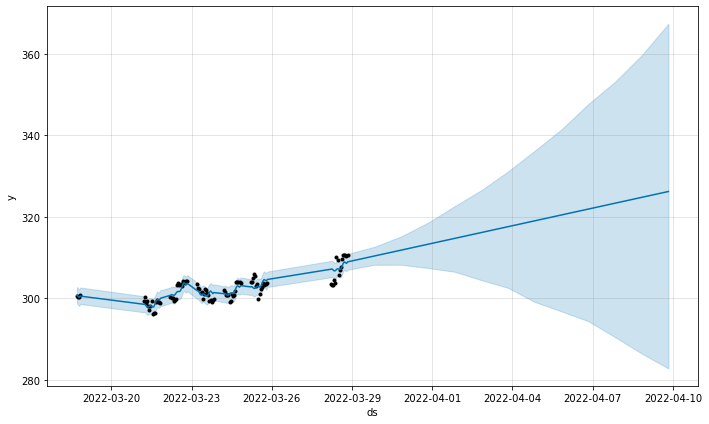

In [75]:
fig1 = m.plot(forecast)

In [6]:
from ezekial import alphaprophet as alpha_op
from dotenv import load_dotenv
import os
from pathlib import Path

load_dotenv()
AV_KEY = os.getenv("APLHA_VANTAGE_KEY")

alpha_op_obj = alpha_op.AlphaProphet(
    alpha_key = AV_KEY,
    alpha_ticker = 'IWL',
    time_interval = '60min',
    forecast_ahead = 12)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/unknown/anaconda3/envs/forecastappenv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/unknown/anaconda3/envs/forecastappenv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/unknown/anaconda3/envs/forecastappenv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.03157
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       470.289   0.000390058       330.518      0.8464      0.8464      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       499.936    0.00164199       319.094      0.4653      0.4653      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       504.237     0.0098141       815.351           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       505.041    0.00116074       974.421           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        505.99    4.0391e-05        128.14      0.9582      0.9582      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [13]:
# alpha_op_obj.encode_plot()

In [11]:
alpha_op_obj.decode_plot()
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')

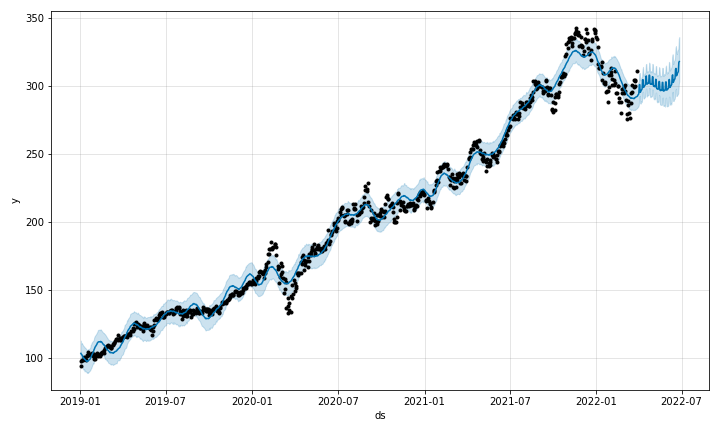

In [12]:
from PIL import Image                                                                                
img = Image.open(forecast_decoded_img_path)
img.show() 